In [1]:
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from pylab import rcParams

from utils import METRICS, CONT_PARAMETERS, LOG_PARAMETERS, SET_PARAMETERS, INT_PARAMETERS, read_files,\
    top_mean_dev_auc, top_min_whole_validation_auc, top_min_dev_auc, read_files

In [2]:
rcParams['figure.figsize'] = 20, 5
pd.set_option('display.max_columns', None)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
files = ['./experiments/good-5fold-3seed.pkl']

In [5]:
top_k = 100000

In [6]:
best_mean_dev = top_mean_dev_auc(read_files(files), top_k)
best_mean_dev.groupby(['file', 'experiment_id']).ngroups

319

In [7]:
best_min_dev = top_min_dev_auc(read_files(files), top_k)
best_min_dev.groupby(['file', 'experiment_id']).ngroups

338

In [8]:
true_best = top_min_whole_validation_auc(read_files(files), top_k)
true_best.groupby(['file', 'experiment_id']).ngroups

386

In [9]:
compare_columns = ['mean_dev_auc', 'mean_validation_auc',
               'mean_whole_validation_auc', 'max_overfit_auc',
                   'min_dev_auc', 'min_validation_auc', 'min_whole_validation_auc']

In [10]:
best_mean_dev[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               100000.0  0.831376  0.001422  0.829038  0.830093   
mean_validation_auc        100000.0  0.807694  0.002131  0.796881  0.806643   
mean_whole_validation_auc  100000.0  0.807633  0.002549  0.794753  0.806218   
max_overfit_auc            100000.0  0.022606  0.005417  0.011644  0.019263   
min_dev_auc                100000.0  0.819760  0.002503  0.809736  0.818051   
min_validation_auc         100000.0  0.804584  0.002688  0.790714  0.803020   
min_whole_validation_auc   100000.0  0.806852  0.002760  0.791515  0.805295   

                                50%       75%       max  
mean_dev_auc               0.831401  0.832517  0.834470  
mean_validation_auc        0.807725  0.809126  0.814007  
mean_whole_validation_auc  0.807891  0.809329  0.814639  
max_overfit_auc            0.020977  0.024453  0.052493  
min_dev_auc                0.820095  0.821654  0.825348  
min_validation_auc         0.804689  0.806377  0.812280  
min_whole_validation_auc   0.807131  0.808776  0.814103

In [11]:
best_min_dev[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               100000.0  0.831067  0.001877  0.824402  0.829845   
mean_validation_auc        100000.0  0.807524  0.002577  0.793525  0.806445   
mean_whole_validation_auc  100000.0  0.807367  0.003048  0.789404  0.805960   
max_overfit_auc            100000.0  0.023256  0.007631  0.009740  0.018694   
min_dev_auc                100000.0  0.820191  0.001917  0.816985  0.818677   
min_validation_auc         100000.0  0.804490  0.003153  0.786036  0.802847   
min_whole_validation_auc   100000.0  0.806677  0.003223  0.789404  0.805177   

                                50%       75%       max  
mean_dev_auc               0.831353  0.832517  0.834470  
mean_validation_auc        0.807870  0.809211  0.814007  
mean_whole_validation_auc  0.807817  0.809431  0.814639  
max_overfit_auc            0.021059  0.025574  0.057405  
min_dev_auc                0.820188  0.821656  0.825348  
min_validation_auc         0.804893  0.806774  0.812280  
min_whole_validation_auc   0.807223  0.808938  0.814103

In [12]:
true_best[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               100000.0  0.828397  0.011807  0.500000  0.827026   
mean_validation_auc        100000.0  0.806870  0.010902  0.500000  0.806716   
mean_whole_validation_auc  100000.0  0.808918  0.001380  0.806511  0.807871   
max_overfit_auc            100000.0  0.019506  0.005090  0.000000  0.016398   
min_dev_auc                100000.0  0.816194  0.018309  0.500000  0.815325   
min_validation_auc         100000.0  0.803445  0.017417  0.500000  0.803627   
min_whole_validation_auc   100000.0  0.808349  0.001350  0.806511  0.807264   

                                50%       75%       max  
mean_dev_auc               0.829933  0.832177  0.834470  
mean_validation_auc        0.808025  0.809312  0.814007  
mean_whole_validation_auc  0.808705  0.809780  0.814639  
max_overfit_auc            0.018984  0.021304  0.052617  
min_dev_auc                0.818293  0.820818  0.825348  
min_validation_auc         0.805337  0.806957  0.812280  
min_whole_validation_auc   0.808107  0.809233  0.814103

In [13]:
best = best_mean_dev

In [14]:
best.shape

(100000, 61)

In [15]:
best.groupby(SET_PARAMETERS + ['file', 'experiment_id']).size().groupby(SET_PARAMETERS).size()

param_is_unbalance  param_boost_from_average
False               False                       71
                    True                        79
True                False                       81
                    True                        88
dtype: int64

In [16]:
best['param_bagging_enable'] = (best.param_bagging_freq != 0)
best.groupby('param_bagging_enable').size()

param_bagging_enable
False    58168
True     41832
dtype: int64

In [17]:
best['param_feature_fraction_enable'] = (best.param_feature_fraction != 1)
best.groupby('param_feature_fraction_enable').size()

param_feature_fraction_enable
False    37907
True     62093
dtype: int64

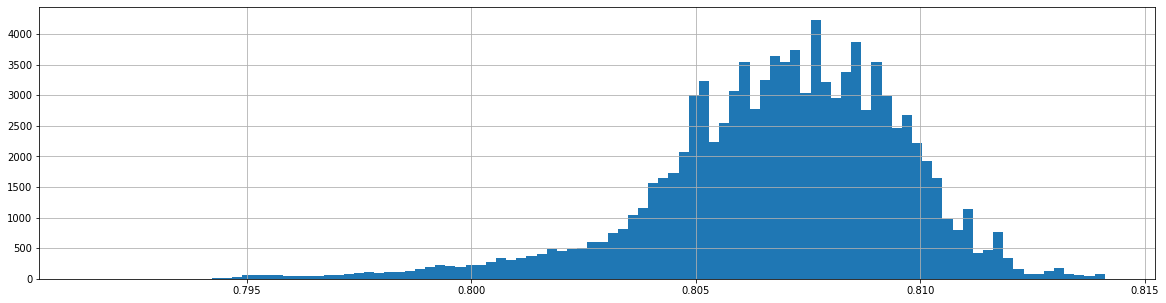

In [18]:
best.min_whole_validation_auc.hist(bins=100);

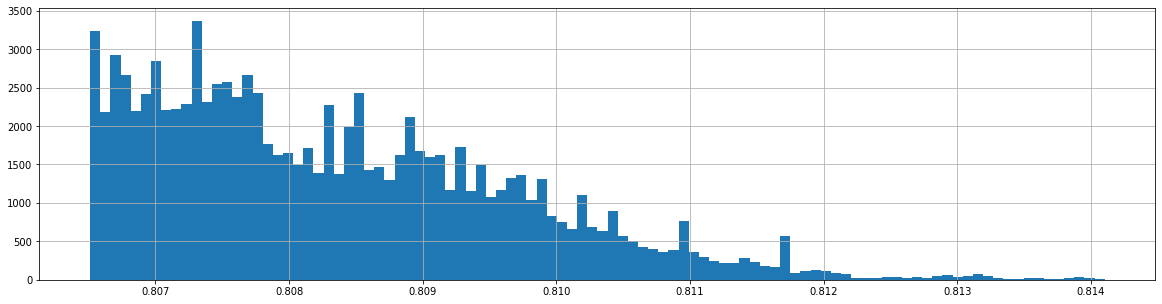

In [19]:
true_best.min_whole_validation_auc.hist(bins=100);

In [20]:
best_iteration = best.sort_values('mean_dev_auc').groupby(['file', 'experiment_id']).last()

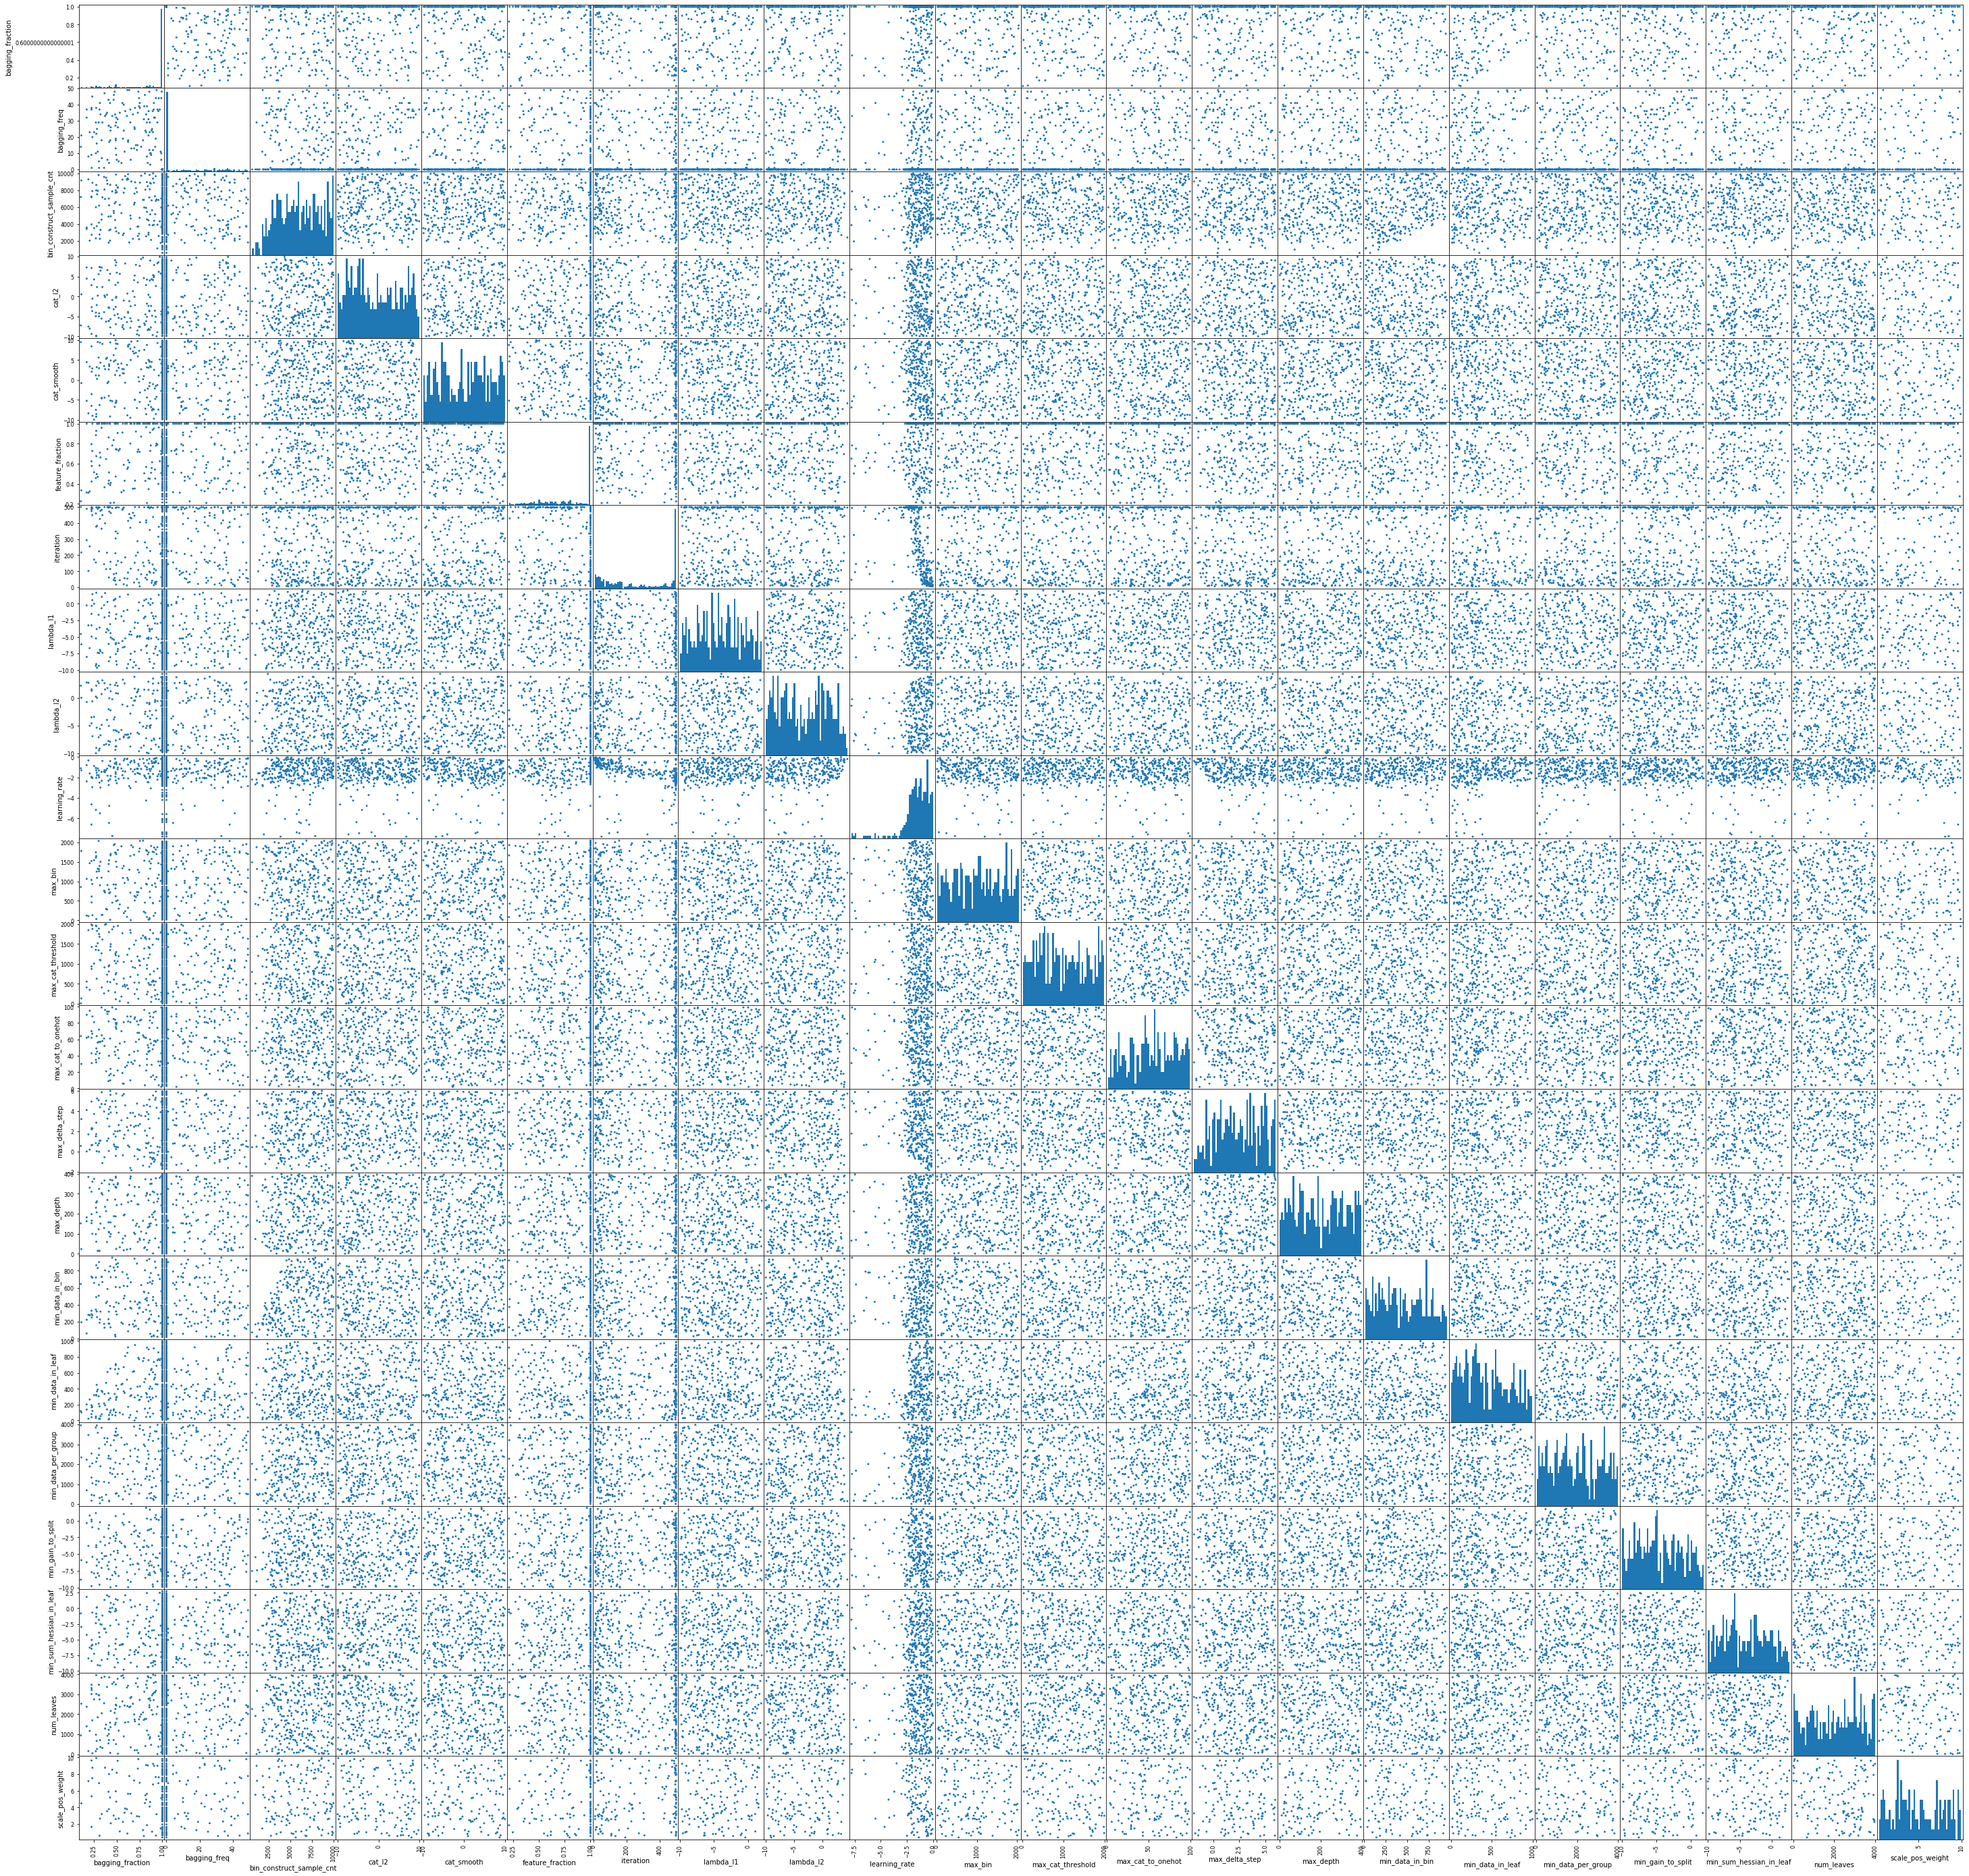

In [21]:
pd.plotting.scatter_matrix(
    pd.concat([best_iteration[CONT_PARAMETERS + INT_PARAMETERS], 
               np.log10(best_iteration[list(set(LOG_PARAMETERS))])],
              axis='columns',
              sort=True
             ).rename(lambda x: x.replace('param_', ''), axis='columns').sort_index(axis=1),
    alpha=1, figsize=(50, 50), hist_kwds={'bins': 50});

### check failures in best selected parameter range

In [22]:
best_range = best\
    [[c for c in best.columns if c.startswith('param_') and not c in SET_PARAMETERS]]\
    .drop(columns=['param_seed', 'param_bagging_enable', 'param_feature_fraction_enable'])\
    .quantile([0, 1]).T
best_range

0.0           1.0
param_bagging_fraction          1.057071e-01  1.000000e+00
param_bagging_freq              0.000000e+00  4.900000e+01
param_bin_construct_sample_cnt  6.020000e+02  9.996000e+03
param_cat_l2                    1.039833e-10  8.474853e+09
param_cat_smooth                1.001139e-10  8.867437e+09
param_feature_fraction          2.083144e-01  1.000000e+00
param_lambda_l1                 1.103529e-10  9.918190e+01
param_lambda_l2                 1.066369e-10  2.389528e+04
param_learning_rate             1.569030e-08  9.626017e-01
param_max_bin                   8.000000e+00  2.042000e+03
param_max_cat_threshold         7.000000e+00  1.998000e+03
param_max_cat_to_onehot         2.000000e+00  9.900000e+01
param_max_delta_step            1.410956e-02  9.853837e+05
param_max_depth                 1.000000e+00  3.970000e+02
param_min_data_in_bin           1.600000e+01  9.550000e+02
param_min_data_in_leaf          1.000000e+00  9.990000e+02
param_min_data_per_group        1.000000e+01  3.998000e+03
param_min_gain_to_split         1.053605e-10  8.090272e+01
param_min_sum_hessian_in_leaf   1.023216e-10  5.336937e+02
param_num_leaves                5.000000e+00  3.989000e+03
param_scale_pos_weight          3.618879e-01  9.919328e+00

In [23]:
dfs = []
for f in files:
    df = pd.read_pickle(f).assign(file=f)
    for (n, l, h) in best_range.itertuples():
        df = df[(((df[n] >= l) & (df[n] <= h))
                 | df[n].isna())].copy()
    dfs.append(df)

limited = pd.concat(dfs, ignore_index=True, sort=True)
del dfs
limited.shape

(781500, 61)

In [24]:
limited_best_iteration = limited.sort_values('min_whole_validation_auc').groupby(['file', 'experiment_id']).last()
limited_best_iteration.shape

(1563, 59)

In [25]:
limited_bad = limited_best_iteration[limited_best_iteration.min_whole_validation_auc < 0.6]

In [26]:
limited_bad.shape

(133, 59)

TODO pikachu with bruises reaction

### top parameters

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(best_iteration.sort_values('mean_dev_auc', ascending=False).head(2).T)

file                                 ./experiments/good-5fold-3seed.pkl  \
experiment_id                                                      481    
cnt                                                                   3   
iteration                                                           195   
max_dev_auc                                                    0.860105   
max_dev_binary_logloss                                         0.525295   
max_overfit_auc                                               0.0217803   
max_overfit_binary_logloss                                    0.0194287   
max_validation_auc                                             0.814348   
max_validation_binary_logloss                                  0.539603   
max_whole_train_auc                                            0.841758   
max_whole_train_binary_logloss                                 0.497199   
max_whole_validation_auc                                       0.812049   
max_whole_validation_bina